# Week 5: 2018/02/19-23

In [1]:
from tock import *

# Monday reading

Read Section 2.1, but skip "Chomsky Normal Form."

# Tuesday class

We're beginning the second unit of the course, in which we look at _context-free grammars_ and _pushdown automata_. Recall that in the first class we briefly introduced Turing machines, and then introduced finite automata as being like Turing machines but restricted to have only a one-way, read-only tape. Pushdown automata are a little bit less restricted: they have a one-way, read-only tape, but they also have a stack. But the book starts with context-free grammars, probably because they're a little more familiar and/or easier to understand.

## Context-free grammars

Context-free grammars were invented in the late 1950s by Noam Chomsky as a way of describing the syntax of human languages (he called them _phrase-structure grammars_). Later, they were appropriate by the inventors of the programming language ALGOL-60 as a way to describe that language's syntax (which came to be called _Backus-Naur form_).

There is some variation in terminology that the book doesn't mention. Most importantly, variables are also called _nonterminal symbols_ or _nonterminals_. You'll hear me call them nonterminals almost exclusively -- I can't get myself to call them variables.

We can start with a simpler example than the book's.
\begin{align*}
S &\rightarrow \mathtt{a}~S~\mathtt{b} \\
S &\rightarrow \varepsilon
\end{align*}
**Question.** What language does this CFG generate?

And here's a version of Example 2.3 that is rewritten using parentheses:
\begin{align*}
S &\rightarrow \mathtt{(}~S~\mathtt{)} \\
S &\rightarrow S~S \\
S &\rightarrow \varepsilon
\end{align*}


## Real-world CFGs

You can see a CFG for C in the [draft standard](http://www.open-std.org/jtc1/sc22/wg14/www/docs/n1570.pdf), starting on page 458, or as a [YACC grammar](http://www.quut.com/c/ANSI-C-grammar-y.html).

[Generalized Phrase Structure Grammar](https://en.wikipedia.org/wiki/Generalized_phrase_structure_grammar) was an attempt to write a CFG for English. The [Berkeley Parser](https://github.com/slavpetrov/berkeleyparser) builds a CFG for English partly using human input and partly automatically.

[L-systems](https://en.wikipedia.org/wiki/L-system) are a kind of visual grammar; context-free L-systems can be used to draw surprisingly natural-looking images, especially of trees:

![Dragon trees](https://upload.wikimedia.org/wikipedia/commons/7/74/Dragon_trees.jpg)

## Closure properties

A language is _context-free_ iff it can be generated by a context-free grammar.

**Question**. Show that context-free languages are closed under union, concatenation, and Kleene star.

We will see later that context-free languagse are _not_ closed under intersection or complement.

## Ambiguity and parsing

If a string can be generated by a CFG, we can write the rules used to generate it as a tree (also called a derivation, a syntax tree, a parse tree, or a phrase-structure tree). This abstracts away from variations in the ordering of rules that we don't care about.

However, it can be that a string has two or more trees. This is known as ambiguity. Ambiguity is pervasive in natural language, but in programming languages is considered a very bad thing.

To a certain extent, we can eliminate ambiguity by rewriting the grammar. Example 2.4 shows how to implement operator precedence in a CFG. In CP2, you'll write a CFG for regular expressions using the same technique.

_Parsing_ is the problem of deciding whether a string can be generated by CFG, and if so, what is its tree (or trees). This is a huge subject. In CP2, you'll write a simple parser, but we leave a full treatment for other courses (_Compilers_ for programming languages, _NLP_ for natural languages).

# Wednesday reading

Read Section 2.2, up to but not including "Equivalence with Context-Free Grammars".

# Thursday class

## Pushdown automata

Pushdown automata are equipped with, in addition to the input tape, a _pushdown store_, said to have been inspired by the tray dispenser in a university dining hall.

Nowadays, a pushdown store is more commonly known as a stack, which you should be quite familiar with. Here's an example (2.14):

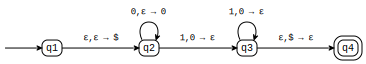

In [2]:
m1 = read_csv("pda-m1.csv")
m1

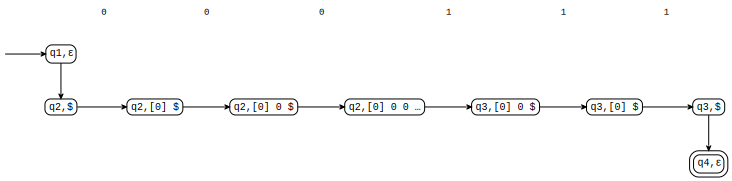

In [3]:
run(m1, "0 0 0 1 1 1")

The run graph shows both the state and the stack at each time step. The square brackets just indicate the top of the stack. Note that when the stack gets deeper, ellipses (…) are used to keep the node labels compact.

This happens to be a deterministic PDA: at every time step, there's only one possibility for the next step.

More examples from the book:

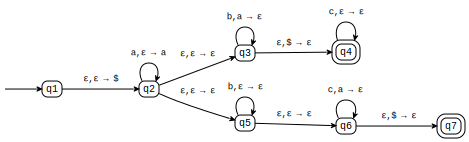

In [4]:
m2 = read_csv("pda-m2.csv")
m2

**Question.** Does the above PDA accept the strings $\mathtt{aabb}$? $\mathtt{aabc}$? $\mathtt{aacc}$?

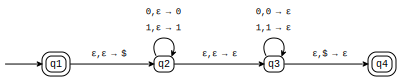

In [5]:
m3 = read_csv("pda-m3.csv")
m3

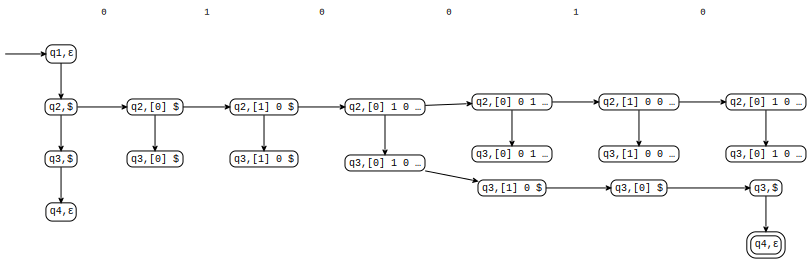

In [6]:
run(m3, "0 1 0 0 1 0")

**Question.** Design a PDA that recognizes the language of matching left and right parentheses (like Example 2.3).

**Question.** Design a PDA that recognizes the language over $\Sigma = \{\mathtt{a}, \mathtt{u}, \mathtt{c}, \mathtt{g}\}$ such that every symbol is paired with exactly one other symbol -- $\mathtt{a}$ with $\mathtt{u}$ and $\mathtt{c}$ with $\mathtt{g}$, and the pairings are nested like parentheses in the previous question.

**Question.** Do you think a queue automaton would be more or less powerful than a pushdown (stack) automaton?